In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.cluster import KMeans
import numpy as np

# 倒入iris数据集，这个数据集是和花卉相关的
iris = datasets.load_iris()

# 打印数据集特征
print("特征名：" + str(iris.feature_names))

# 探索一个样本数据，每行数据4列，分别表示上述4种特征
print("第一行样本：" + str(iris.data[:1]))

# 第一个样本属于哪个品种，用数字代号表示
print("第一行样本所属品种：" + str(iris.target[:1]))

特征名：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
第一行样本：[[5.1 3.5 1.4 0.2]]
第一行样本所属品种：[0]


Text(0, 0.5, 'Sepal Width')

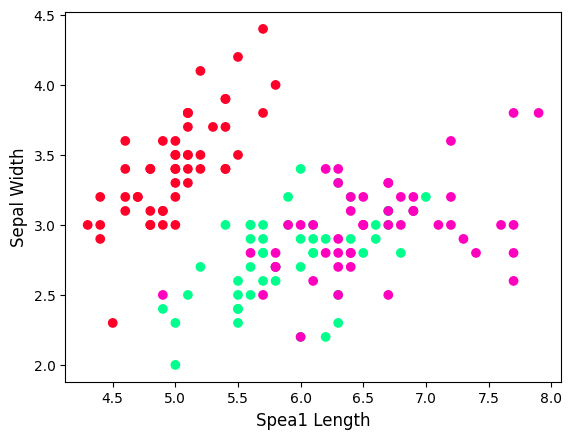

In [4]:
# 查看前两列数据，即花萼的长度和宽度
X = iris.data[:, :2]
y = iris.target

# 将数据集中所有数据进行二维可视化展示
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)

In [5]:
# 对数据集使用K-Means进行聚类
km = KMeans(n_clusters = 3)
km.fit(X)

# 打印聚类后各个簇的中心点
centers = km.cluster_centers_
print(centers)

[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]


Text(0.5, 1.0, 'Predicted')

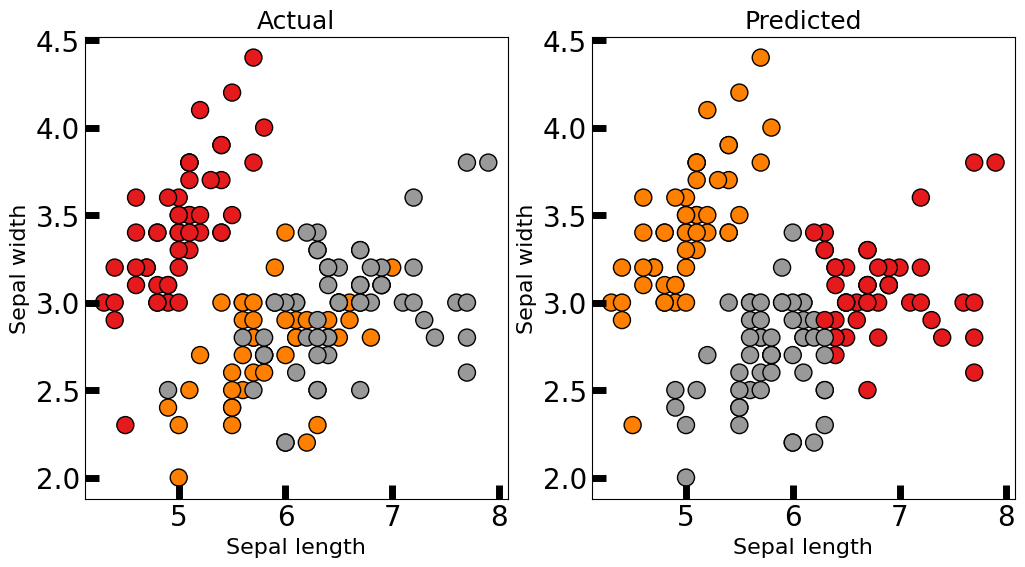

In [6]:
# 比较聚类效果与真实品种之间的差异
predicted_labels = km.labels_

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, 
                edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap=plt.cm.Set1,
                edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=16)
axes[0].set_ylabel('Sepal width', fontsize=16)
axes[1].set_xlabel('Sepal length', fontsize=16)
axes[1].set_ylabel('Sepal width', fontsize=16)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [11]:
# 使用HIBOG处理原本的数据集,这两个函数就是根据下面的算法写的
def get_dc(data,m,size):
    # 数据初始化
    number = data.shape[0]
    k=0
    b = torch.ones(number,m+1,size)
    distance = torch.ones(number, m+1)
    
    # 计算欧式距离的函数
    pdist = torch.nn.PairwiseDistance(p=2)
    
    # 对数据集中任意两点计算距离，存到distance数组
    for i in range(0,number):
        a = []
        for j in range(0,number):
            dist = pdist(data[i],data[j])
            a.append(dist)
        index = pd.Series(a).sort_values().index[:m+1]
        for x in range(0,m+1):
            b[i][x] = data[index[x]]
            distance[i][x] = a[index[x]]
        a.sort()
        k+=a[1]
    #返回临近的若干点、平均距离、距离数组
    return b,k/number,distance

def newdata(da,size=4):
    x = pd.DataFrame(da)
    x = torch.tensor(data=x.to_numpy())
    T = 0.3
    k=  3
    # 获取临近的若干点、平均距离、距离数组
    topk,dc,distance = get_dc(x,k,size)
    b = torch.ones(x.shape[0], size)
    for i in range(0,x.shape[0]):
        for j in range(0,k):
            # 计算重力并加上
            F = dc*distance[i][1]*(topk[i][j+1]-topk[i][0])/distance[i][j+1]/distance[i][j+1]
            b[i]=b[i]+F
        #得到新数据
        topk[i][0] =  topk[i][0]+T*b[i]
    data = torch.ones(x.shape[0],size)
    for i in range(0, x.shape[0]):
        data[i] = topk[i][0]
    return data


<img src="images/k-means/IMG_20221206-223750381.png" style="zoom:40%">

Text(0, 0.5, 'Sepal Width')

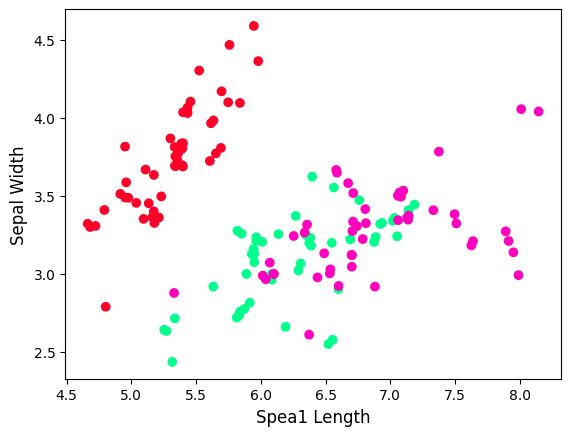

In [12]:
new=newdata(iris.data)
# print(new)

# 将新数据集中所有数据进行二维可视化展示
plt.scatter(new[:,0], new[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)


Text(0.5, 1.0, 'Predicted')

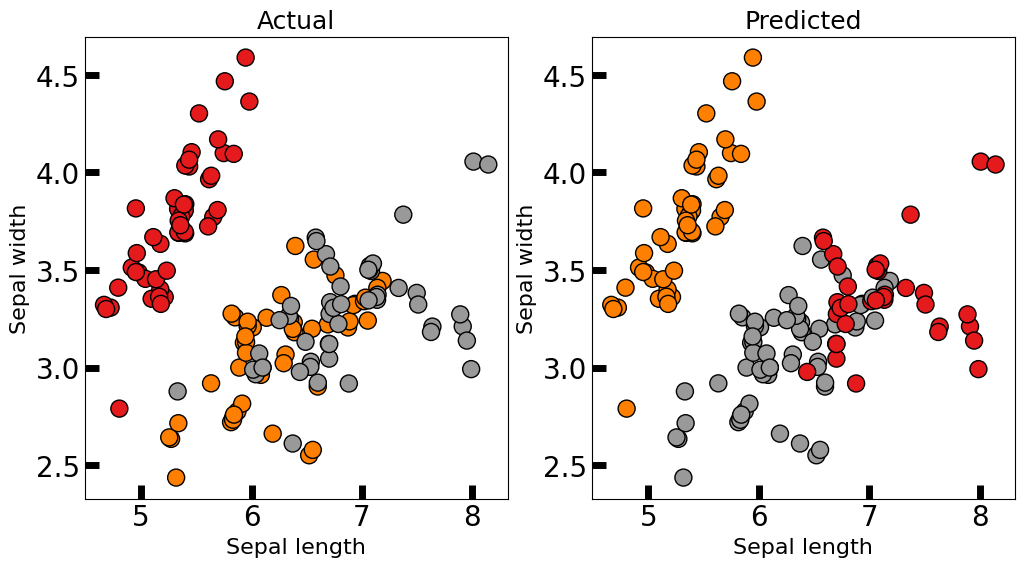

In [9]:
# 对数据集使用K-Means进行聚类
km = KMeans(n_clusters = 3)
km.fit(new)

# 打印聚类后各个簇的中心点
centers = km.cluster_centers_
# 比较聚类效果与真实品种之间的差异
predicted_labels = km.labels_

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(new[:, 0], new[:, 1], c=y, cmap=plt.cm.Set1, 
                edgecolor='k', s=150)
axes[1].scatter(new[:, 0], new[:, 1], c=predicted_labels, cmap=plt.cm.Set1,
                edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=16)
axes[0].set_ylabel('Sepal width', fontsize=16)
axes[1].set_xlabel('Sepal length', fontsize=16)
axes[1].set_ylabel('Sepal width', fontsize=16)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [10]:
print(new.shape)

torch.Size([150, 4])
